# Digital Trace Data - Lab 3: Platform-Centric Analysis

## Part 1: Collaboration With Companies and Data Dumps

Until very recently, Facebook, Twitter (X) and Reddit allowed to access their data freely. As a result, thousands of papers have used that data.

We live now in the "APIcalypse" (Bruns, 2021), where research often depends on collaboration with companies. As the Co-Chairs and European Advisory Committee of Social Science One explained in the context of Facebook

_The current situation is untenable. Heated public and political discussions are waged over the role and responsibilities of platforms in today’s societies, and yet researchers cannot make fully informed contributions to these discussions. We are mostly left in the dark, lacking appropriate data to assess potential risks and benefits. This is not an acceptable situation for scientific knowledge. It is not an acceptable situation for our societies._


There are still some options:
- Direct collaborations with companies, providing direct access to the data (see for example [this paper](https://www.nature.com/articles/s41586-022-04996-4))
- Using data social media chose to release, such as [the Social Science One](https://socialscience.one/) program, or [the Social Connectednesss Index](https://data.humdata.org/dataset/social-connectedness-index
)
- Previous data that is still available. For the example of Reddit, you can find a more detailed description of how to access data [here](https://www.reddit.com/r/pushshift/comments/1akrhg3/separate_dump_files_for_the_top_40k_subreddits/). We will use some of these data in lab 5.
- Organizations and governments also tend to make their data (including digital trace data) public. Have a look at [this link](https://utrecht.incijfers.nl/jive/), to see what data the municipality of Utrecht makes accessible.


### 1.1 Look at the [Reddit's robots.txt page](https://www.reddit.com/robots.txt). Are crawlers generally allowed? Hint: You can find info on how to read it [here](https://www.promptcloud.com/blog/how-to-read-and-respect-robots-file/).


Answer: No, they are not. All pages on the site are disallowed for all user-agents.

### 1.2 Inspect [Reddit's ToS](https://www.redditinc.com/policies/user-agreement-september-25-2023). Is scraping generally allowed?

Answer: No ("[...] you may not do the following: [...] Access, search, or collect data from the Services by any means (automated or otherwise) except as permitted in these Terms or in a separate agreement with Reddit (we conditionally grant permission to crawl the Services in accordance with the parameters set forth in our robots.txt file, but scraping the Services without Reddit’s prior written consent is prohibited)")

### 1.3 Are you allowed to scraped public data from Reddit in the EU? what about personal data?

It is likely legal to scrape non-personal public data from Reddit (even when Reddit asks you not to do it).

The GDPR allows to download personal data when informed consent from the participants is granted (e.g. through data donation) or when there is a legitimate interest (e.g. important research) that outweights the privacy risks.

### 1.4 Download the countries file from the [Facebook' Social connectedness Index](https://data.humdata.org/dataset/social-connectedness-index)
* What are the most connected countries to the Netherlands?
* How is it measured?

Curacao (CW), Aruba (AW), and Suriname (SR) have the highest Scaled SCI with the Netherlands.

The Scaled SCI is calculated by dividing the total number of Facebook connections between countries i and j (the observed number of connections) by the product of Facebook users in country i and Facebook users in country j (the expected number of connections assumming random mixing).

## Part 2: APIs

APIs (Application Programming Interfaces) are like special doorways websites that allow you to access their data in an organized and efficient way. Think of a website as a big building with lots of information inside. The website's API is a receptionist who can fetch the specific information you ask for. You just need to know how to ask properly.

When you use an API, you are following rules and formats set by the website to request data, ensuring that your data collection is more likely to be ethical and legal.

APIs are great when they're available because they give direct access to the data in a structured format, making it easier to analyze.
   

### 2.1 Get access to the Wikimedia API

For now, let us use the Wikimedia API. To do so, follow the steps outlined in this week's lecture. In summary:

1. Go to the [Wikimedia API Portal](https://api.wikimedia.org/).
2. Create an account (you can find the link [here](https://api.wikimedia.org/wiki/Special:CreateAccount)), if you haven't already.
3. Log into your account and create a personal API token (Note: To do that, you need to add an email address to your account in the settings and confirm it). Make sure to copy the details created, especially the access token. Click [here](https://api.wikimedia.org/wiki/Special:AppManagement) to manage your API token.
4. Finally, paste in your access token into the place holder after `Authorization`(i.e. remove `Placeholder_Access_Token` and paste in your actual token) and add your details after `User-Agent` (remove the placeholder `Placeholder_User_Agent` and paste in your details).
5. Check if the code below runs without errors with your provided token. In case it doesn't, check out [*Getting featured content from Wikipedia with Python*](https://api.wikimedia.org/wiki/Getting_featured_content_from_Wikipedia_with_Python) or the [*Troubleshooting guide*](https://api.wikimedia.org/wiki/Authentication#Troubleshooting).

In [1]:
# Get today's featured article from English Wikipedia
import datetime
import requests

today = datetime.datetime.now()
date = "2024/09/20" #today.strftime('%Y/%m/%d')

url = 'https://api.wikimedia.org/feed/v1/wikipedia/en/featured/' + date

headers = {
  'Authorization': 'Placeholder_Access_Token',
  'User-Agent': 'Placeholoder_YOUR_APP_NAME (YOUR_EMAIL_OR_CONTACT_PAGE)'
}

response = requests.get(url, headers=headers)

# 200 means successful
print(response.status_code)

# Read the JSON of the response
data = response.json()


200


In [6]:
# These are the keys of the JSON file
data.keys()

dict_keys(['tfa', 'news', 'onthisday'])

In [7]:
# Show the featured article
data["tfa"]

{'type': 'standard',
 'title': 'Addie_Viola_Smith',
 'displaytitle': '<span class="mw-page-title-main">Addie Viola Smith</span>',
 'namespace': {'id': 0, 'text': ''},
 'wikibase_item': 'Q21535131',
 'titles': {'canonical': 'Addie_Viola_Smith',
  'normalized': 'Addie Viola Smith',
  'display': '<span class="mw-page-title-main">Addie Viola Smith</span>'},
 'pageid': 76614010,
 'thumbnail': {'source': 'https://upload.wikimedia.org/wikipedia/commons/b/b3/Addie_Viola_Smith.jpg',
  'width': 439,
  'height': 533},
 'originalimage': {'source': 'https://upload.wikimedia.org/wikipedia/commons/b/b3/Addie_Viola_Smith.jpg',
  'width': 439,
  'height': 533},
 'lang': 'en',
 'dir': 'ltr',
 'revision': '1246484581',
 'tid': 'b60762b3-7655-11ef-910e-5587e041206c',
 'timestamp': '2024-09-19T07:06:37Z',
 'description': 'American attorney, trade commissioner, and Foreign Service officer (1893–1975)',
 'description_source': 'local',
 'content_urls': {'desktop': {'page': 'https://en.wikipedia.org/wiki/Addie

In [9]:
# Find how many important wikipedia events happened on that day
len(data["onthisday"])

21

In [ ]:
data["tfa"]["pageid"]

76614010

#### Question 2.1.1: Above we retrieve the top-featured article's `pageid`. What information does it contain? (Hint: Take a look at the [documentation](https://api.wikimedia.org/wiki/Feed_API/Reference/Featured_content)) and at https://en.wikipedia.org/?curid=76614010

Answer: The unique Article identifier.

#### Question 2.1.2: How would you extract the "news" of today? (For help, again take a look at the [documentation](https://api.wikimedia.org/wiki/Feed_API/Reference/Featured_content))

Answer: By referring to `data["news]`. This contains a short summary of the story in HTML (`data["news]["story"]`) and the links (`data["news]["story"]`).

#### Question 2.1.3: What was the featured article on September 9th, 2023?

In [ ]:
date = "2023/09/09"
url = 'https://api.wikimedia.org/feed/v1/wikipedia/en/featured/' + date
response = requests.get(url, headers=headers)
data = response.json()
data["tfa"]["title"]

'The_Million_Second_Quiz'

Answer: *The Million Second Quiz*

#### Question 2.1.4: What are your rate limits (Hint: Use the API documentation's search bar)

Answer: 5,000 requests per hour

#### Question 2.1.5: What does the 200 HTTP status code mean?

Answer: Success

#### Question 2.1.6: What would it mean to get a 503 HTTP status code?

Answer: Connection error

### Part 2.2 Using The Guardian's Discussion API

In this second part, we will be using The Guardian's *Discussion API*. With this API we can easily access the comments to articles posted by The Guardian. In case you are interested in some more detailed information, you can find the API's documentation [here](https://discussion.theguardian.com/discussion-api/).

Let us now get to know the API in more detail!

Here is an example API call to their API `https://discussion.theguardian.com/discussion-api/popular`

What is the base URL? What is the endpoint? What are the parameters of the call?



*ADD YOUR ANSWER HERE*

* Base URL: https://discussion.theguardian.com/discussion-api
* Endpoint: /popular
* Parameters: None

#### Question 2.2.1: What are the most popular articles today?

*ADD YOUR ANSWER HERE*

#### Question 2.2.2: Explore the comments to article "q8242" [https://discussion.theguardian.com/discussion-api/discussion/p/q8242?orderBy=oldest&page=2&pageSize=50](https://discussion.theguardian.com/discussion-api/discussion/p/q8242?orderBy=oldest&page=2&pageSize=50).

What happens if you change the ID, eg. to one of these: ['p/q8242', '/p/qpvnn', '/p/qp375', '/p/qp8xf', '/p/qp8k8', '/p/qp8y5', '/p/qpxdc', '/p/qp5bn', '/p/qjpe6', '/p/qz9bm', '/p/qzp2q', '/p/qp2ky', '/p/qyep6', '/p/qp8aq', '/p/qp9he', '/p/qp8c2', '/p/qz8mc', '/p/qzzjf', '/p/q7jx2', '/p/qnzb2', '/p/qp7bz']

Answer: It changes the article to *UK politics: government likely to have to ‘pay some Waspi compensation in election year’ – as it happened*, *Tory government ‘worst in postwar era’, claims expert study – as it happened*, etc.

Now, we will actually analyze some of the comments!

To start, we first define a function with which we can extract all comments of a certain discussion. All we then need to provide is the article's ID and we'll receive a

In [10]:
import requests
import json

def get_comments_id(id):
    """
    This function extracts all the comments of a particular discussion
    """
    current_page = 1
    pages = 1

    all_comments = []
    # Continue requesting new pages until we reach the end
    while current_page <= pages:
        print(current_page, end=": ")

        # Call the API
        r = requests.get(f"https://discussion.theguardian.com/discussion-api/discussion/{id}?orderBy=oldest&page={current_page}&pageSize=100")

        # Convert it to JSON
        comments = json.loads(r.text)

        # Raise if errors
        if comments["status"] != "ok":
            raise requests.HTTPError(f"Error: Received status '{comments['status']}' instead of 'ok'")

        # Process the comments
        for comment in comments["discussion"]["comments"]:
            if comment["status"] == "visible":
                all_comments.append(comment["body"])
            if comment.get("responses") is not None:
                for com in comment["responses"]:
                   if com["status"] == "visible":
                        all_comments.append(com["body"])

        # Update the counters
        current_page = comments["currentPage"]+1
        pages = comments["pages"]

    return all_comments

Next, we can retrieve all comments to the specified article:

In [11]:
all_comments = get_comments_id("p/qpvnn")

1: 2: 3: 4: 5: 6: 7: 8: 9: 10: 11: 12: 13: 14: 15: 16: 17: 18: 19: 20: 21: 22: 23: 24: 25: 26: 27: 28: 29: 30: 31: 32: 

And print the results (only the first 5 are shown):

In [12]:
all_comments[:5]

['<p>Tax!<br>Tax!!<br>Tax!!!<br>Tax!!!!<br>Tax!!!!!</p> <p>Taxi for the Tories.</p>',
 "<p>Rish! announces he'll go on LBC phone-in. </p> <p>CCHQ collectively facepalms at the likely loss of some more seats.</p>",
 '<p>Nah, let the useless lot walk.</p>',
 "<p>Planned some time ago. Just fortuitous, I'm sure, that his pledge to gain control of inflation happens to be bang on target and on time. Even though, of course, it's the achievement of the - politically independent - Bank of England.</p>",
 "<p>The Tories will be terrified at the prospect of Sunak bring involved in a phone in. </p> <p>His ability to attract disaster is his only superpower. </p> <p>And speaking of terrified Tories, the obvious lies and made-up guff on the front pages of all those oligarch-owned newspapers speak for themselves. It's all about the battle for second place now.</p>"]

As you can see the comments still contain some HTML tags. Since we don't want to keep these tags in our analyses, let us know define a function with which we can remove those HTML tags.

In [13]:
import re

# Function to remove HTML tags from a string
def remove_html_tags(text):
    # Use re.sub() to replace HTML tags with an empty string
    return re.sub('<.*?>', '', text)

Now, we can create a list of all cleaned comments...

In [14]:
# Removing HTML tags from all_comments
comments_cleaned = [remove_html_tags(item) for item in all_comments]

... and print those comments

In [15]:
# Print the cleaned list of commentsc
comments_cleaned[:5]

['Tax!Tax!!Tax!!!Tax!!!!Tax!!!!! Taxi for the Tories.',
 "Rish! announces he'll go on LBC phone-in.  CCHQ collectively facepalms at the likely loss of some more seats.",
 'Nah, let the useless lot walk.',
 "Planned some time ago. Just fortuitous, I'm sure, that his pledge to gain control of inflation happens to be bang on target and on time. Even though, of course, it's the achievement of the - politically independent - Bank of England.",
 "The Tories will be terrified at the prospect of Sunak bring involved in a phone in.  His ability to attract disaster is his only superpower.  And speaking of terrified Tories, the obvious lies and made-up guff on the front pages of all those oligarch-owned newspapers speak for themselves. It's all about the battle for second place now."]

Lastly, to actually analyze the content of the comments we've retrieved, we can visualize them by creating a word cloud:

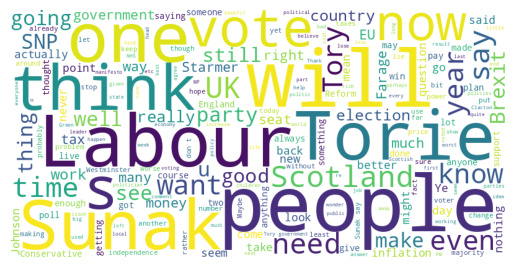

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine strings in list into one
comments_comb = ' '.join(comments_cleaned)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_comb)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Save the comments to the hard drive. Check that they are saved by clicking on the "Files" icon located on the left menu

In [17]:
with open('comments.txt', 'w+') as f:
  for comment in comments_cleaned:
    f.write(comment.replace("\n",". ") + '\n')


## Part 3: Web Scraping

Web scraping is like going through the website's pages yourself, taking notes of the information you find. You use tools or write scripts (small programs) that automatically browse the web, find the pages you're interested in, and copy the data you need. It's like sending a robot to take photos of the pages.

However, scraping has its challenges. Websites can change how they look and where they put information, which can break your script. Also, scraping a lot of data quickly can put heavy traffic on the website, similar to a crowd of robots rushing in all at once, which can slow down the site or get your access blocked.


## 3.1 Let's scrape some data!

Does https://www.nu.nl/robots.txt restrict crawlers? which kind?


Now let's get to the actual scraping. For that we will use the [Webscraper.io](Webscraper.io) extension in Google Chrome or Firefox. The instructions are written for Google Chrome, but they are very similar for Firefox.

To use it, follow the instructions below:

1. Using Google Chrome, go to the [Webscraper.io extension in the Chrome Web Store](https://chromewebstore.google.com/detail/web-scraper/jnhgnonknehpejjnehehllkliplmbmhn?hl=en)

2. Now, click on *Add to Chrome* and and add the extension in the pop-up window.

3. Next, open the Google Chrome's Developer Tools by clicking on the three-dot menu on the top-right, selecting *More Tools* and the *Developer Tools*

4. Now toggle the docking position to the bottom by pressing `Ctrl`+ `Shift`+ `D` (Windows) or `Cmd`+ `Shift`+ `D` (Mac)

5. Open a NU.nl article (e.g., https://www.nu.nl/wetenschap/6324979/tienjarig-brits-meisje-vindt-bij-toeval-pootafdrukken-van-dinosaurus-op-strand.html), then *Web Scraper* will appear in the rightmost side of the Developer Tools

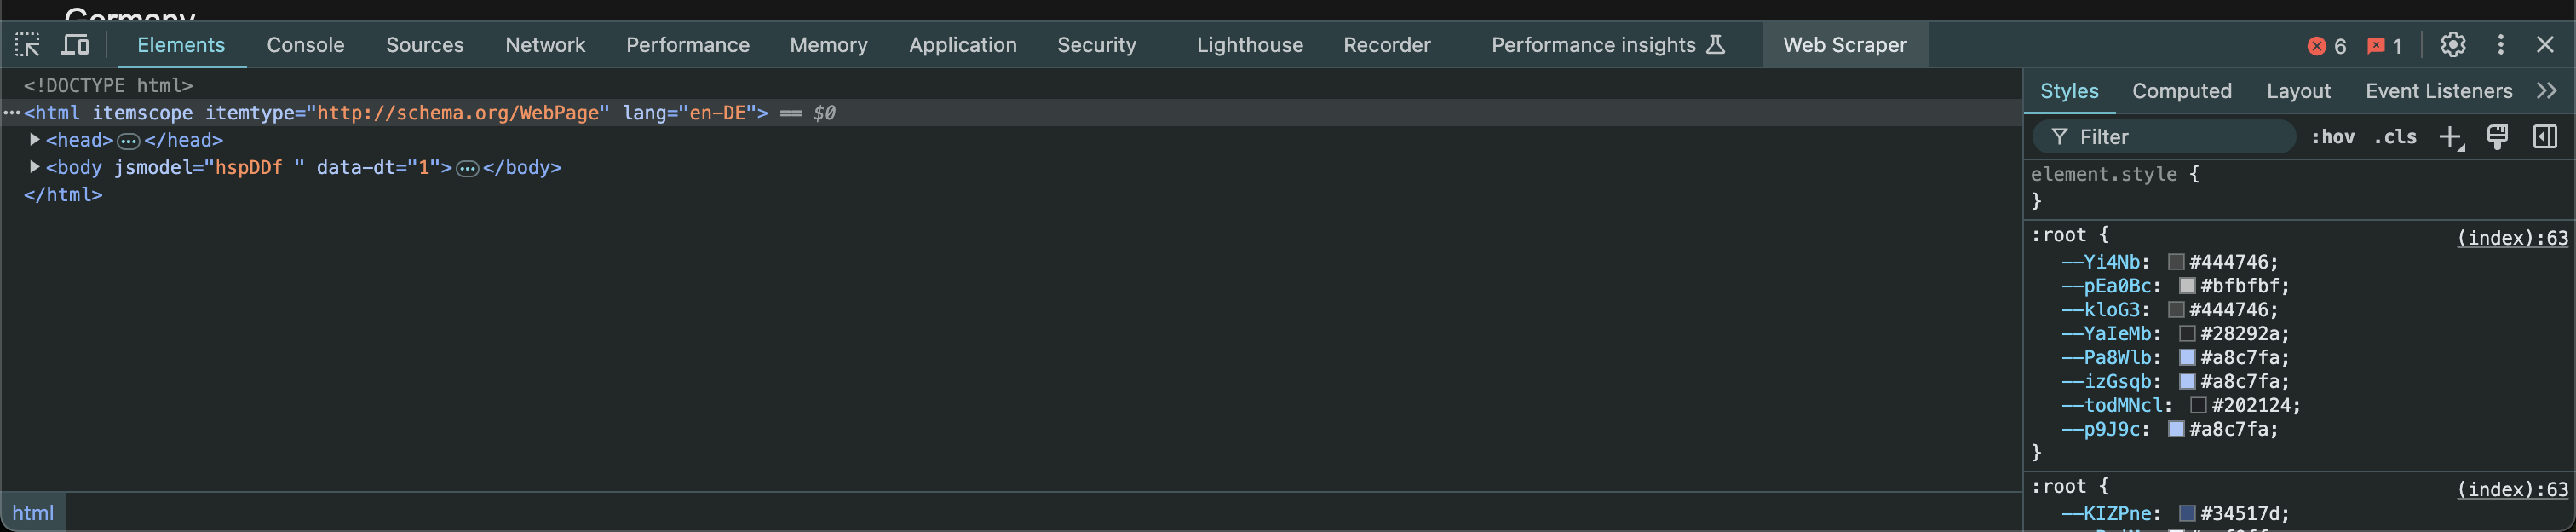

6. Click on *Create new sitemap* and select *Create Sitemap*

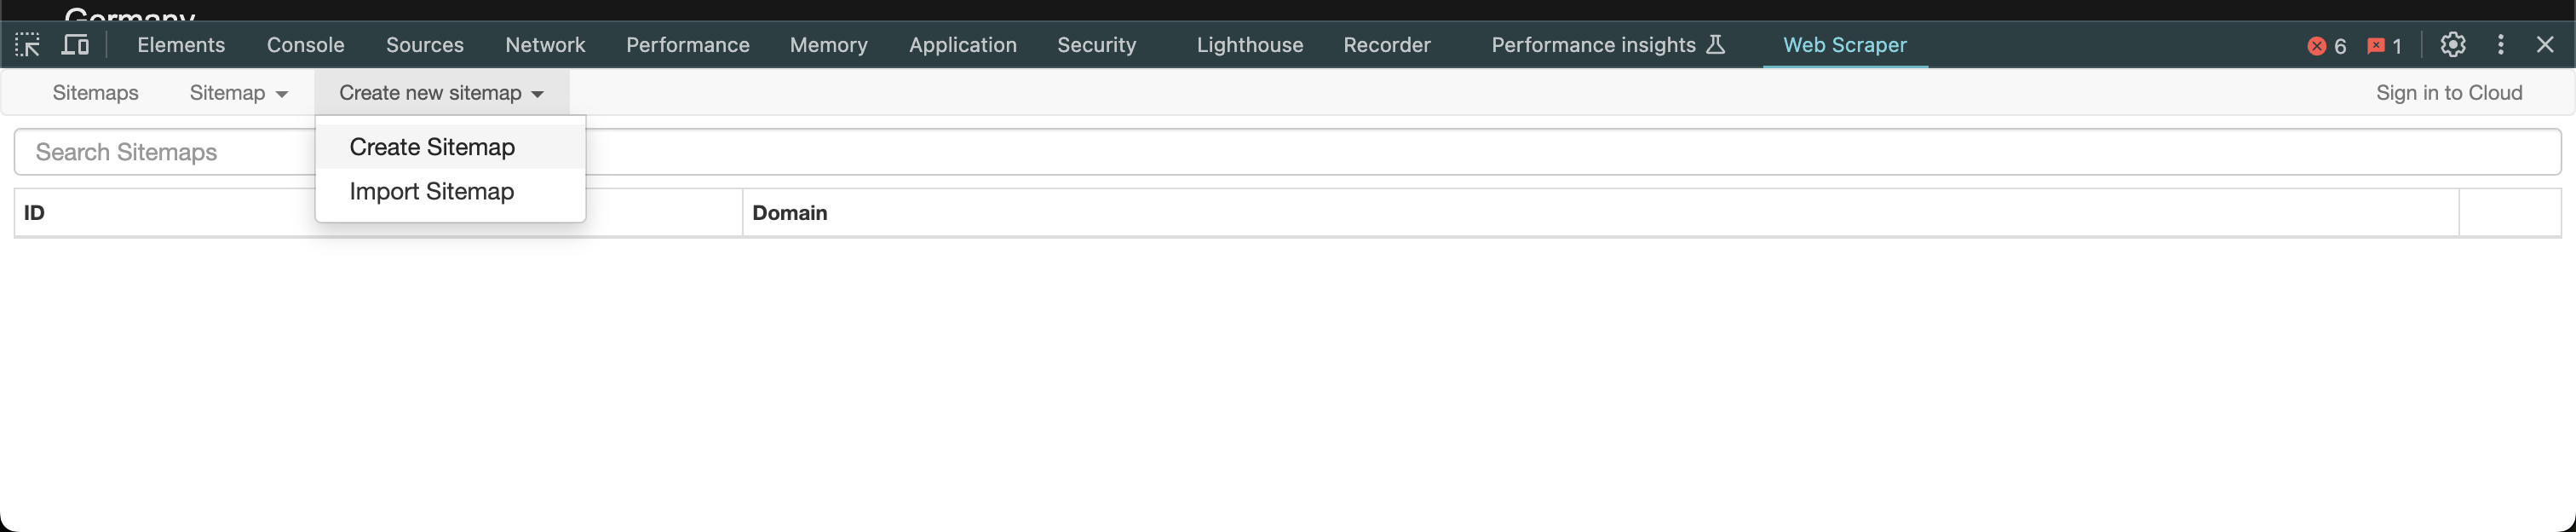

7. Now name your Sitemap and add all the URLs you want to scrape. You can add URLs by clicking on the + on the right and pasting in the URLs. Here we are aiming to scrape data from the 10 articles below which you should add (make sure to copy the URL text):

- https://www.nu.nl/wetenschap/6324979/tienjarig-brits-meisje-vindt-bij-toeval-pootafdrukken-van-dinosaurus-op-strand.html
- https://www.nu.nl/algemeen/6324618/nederlandse-steden-niet-gebouwd-op-hitte-te-veel-ongezond-warme-huizen.html
- https://www.nu.nl/politiek/6310509/huurmarkt-aan-banden-gelegd-kamer-stemt-in-met-veelbesproken-wet.html
- https://www.nu.nl/dieren/6324971/australische-huisspin-vestigt-zich-in-nederland-geen-gevaar-voor-mensen.html
- https://www.nu.nl/goed-nieuws/6324881/goed-nieuws-deze-week-steur-terug-in-nederland-computer-helpt-als-patient.html
- https://www.nu.nl/klimaat/6323785/na-dertien-maanden-einde-aan-reeks-wereldwijde-temperatuurrecords.html
- https://www.nu.nl/economie/6279582/op-kamers-gaan-wordt-nog-moeilijker-voor-nederlandse-studenten.html
- https://www.nu.nl/wetenschap/6322013/een-glaasje-wijn-per-dag-is-niet-gezonder-dan-helemaal-niet-drinken.html
- https://www.nu.nl/eten-en-drinken/6303942/meeste-nederlanders-eten-een-of-twee-avonden-per-week-vegetarische-maaltijd.html
- https://www.nu.nl/dieren/6324441/verkeerd-maaien-blijkt-funest-donker-pimpernelblauwtje-uit-nederland-verdwenen.html

8. At this point we can start specifying the information we want to scrape. To do this, click on *Save Sitemap* and then on *Add new selector*

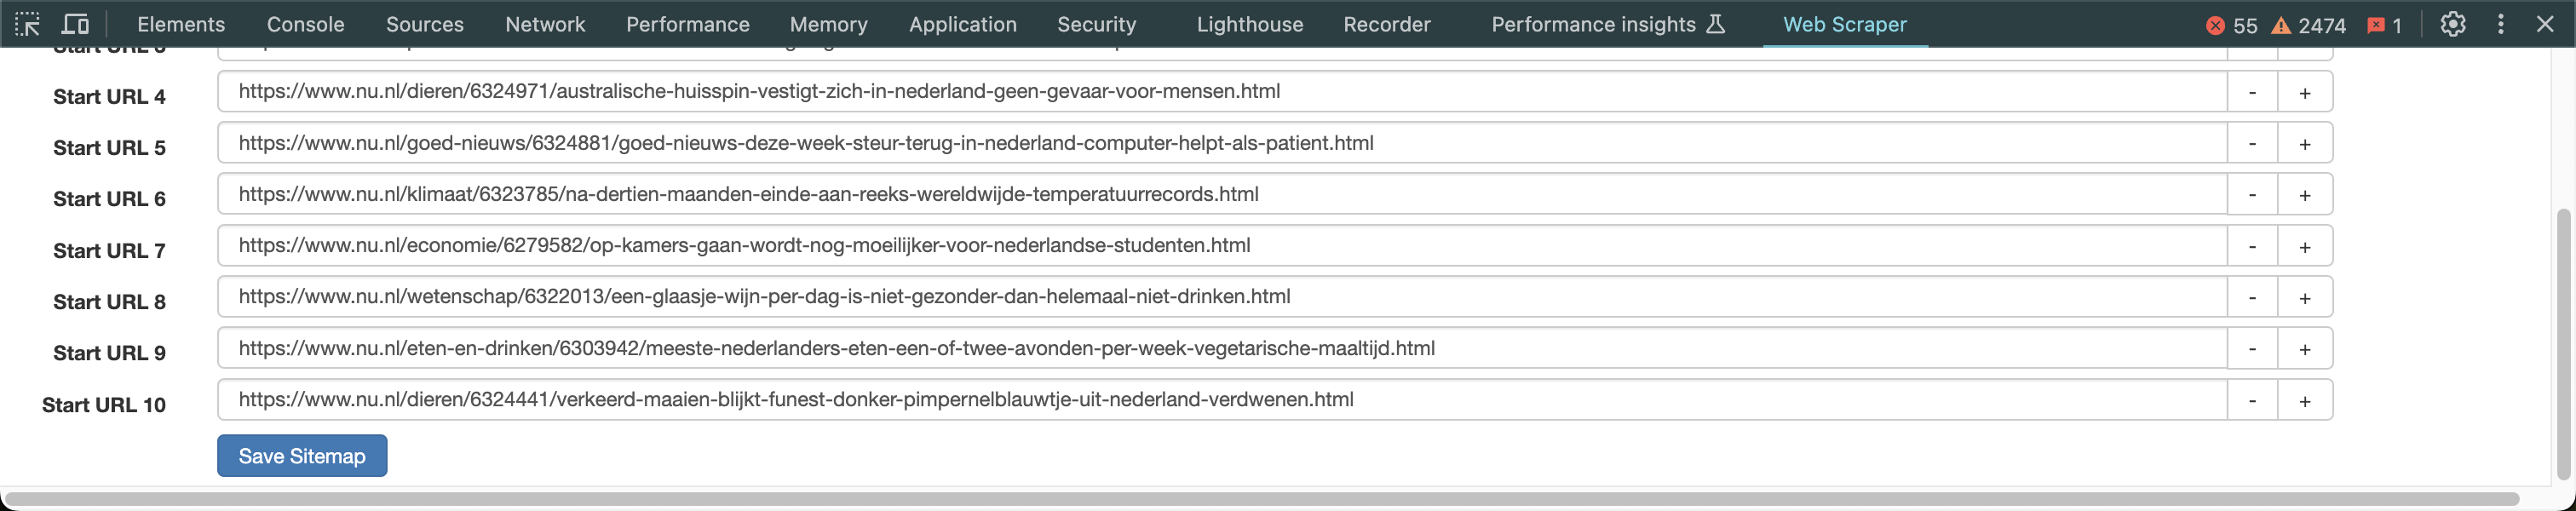

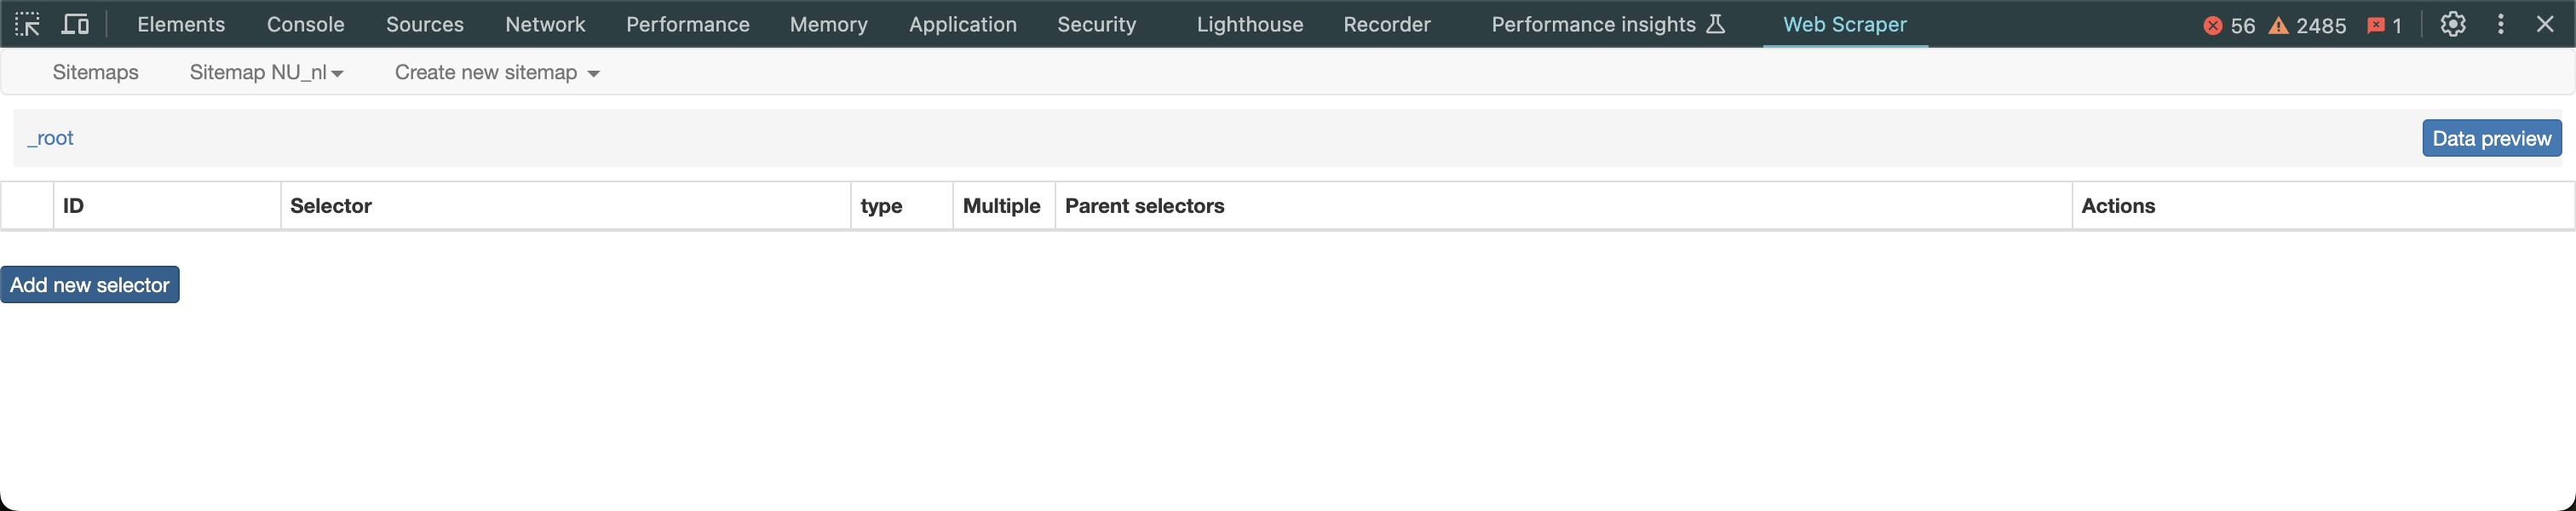

9. Each selector will retrieve part of the website (e.g. title/artitle/number of comments). Add a name for each selector under Id. Then, under *Selector* choose `Select`. On the nu.nl article, then click on the specific text you want to retrieve. Then, select *Done selecting* and click on *Save selector* to add the selector. If you want to select multiple things (e.g. to include multiple paragraphs, and not only the first instance), make sure to tick `Multiple`.

You can apply this procedure for as many selectors as you want.

In the example below, we are selecting the title by clicking on the article's title and then selecting *Done selecting*.

Do this for the article's date (name the id 'date', introduction paragraph (id: 'intro'), and main text (id: 'main')

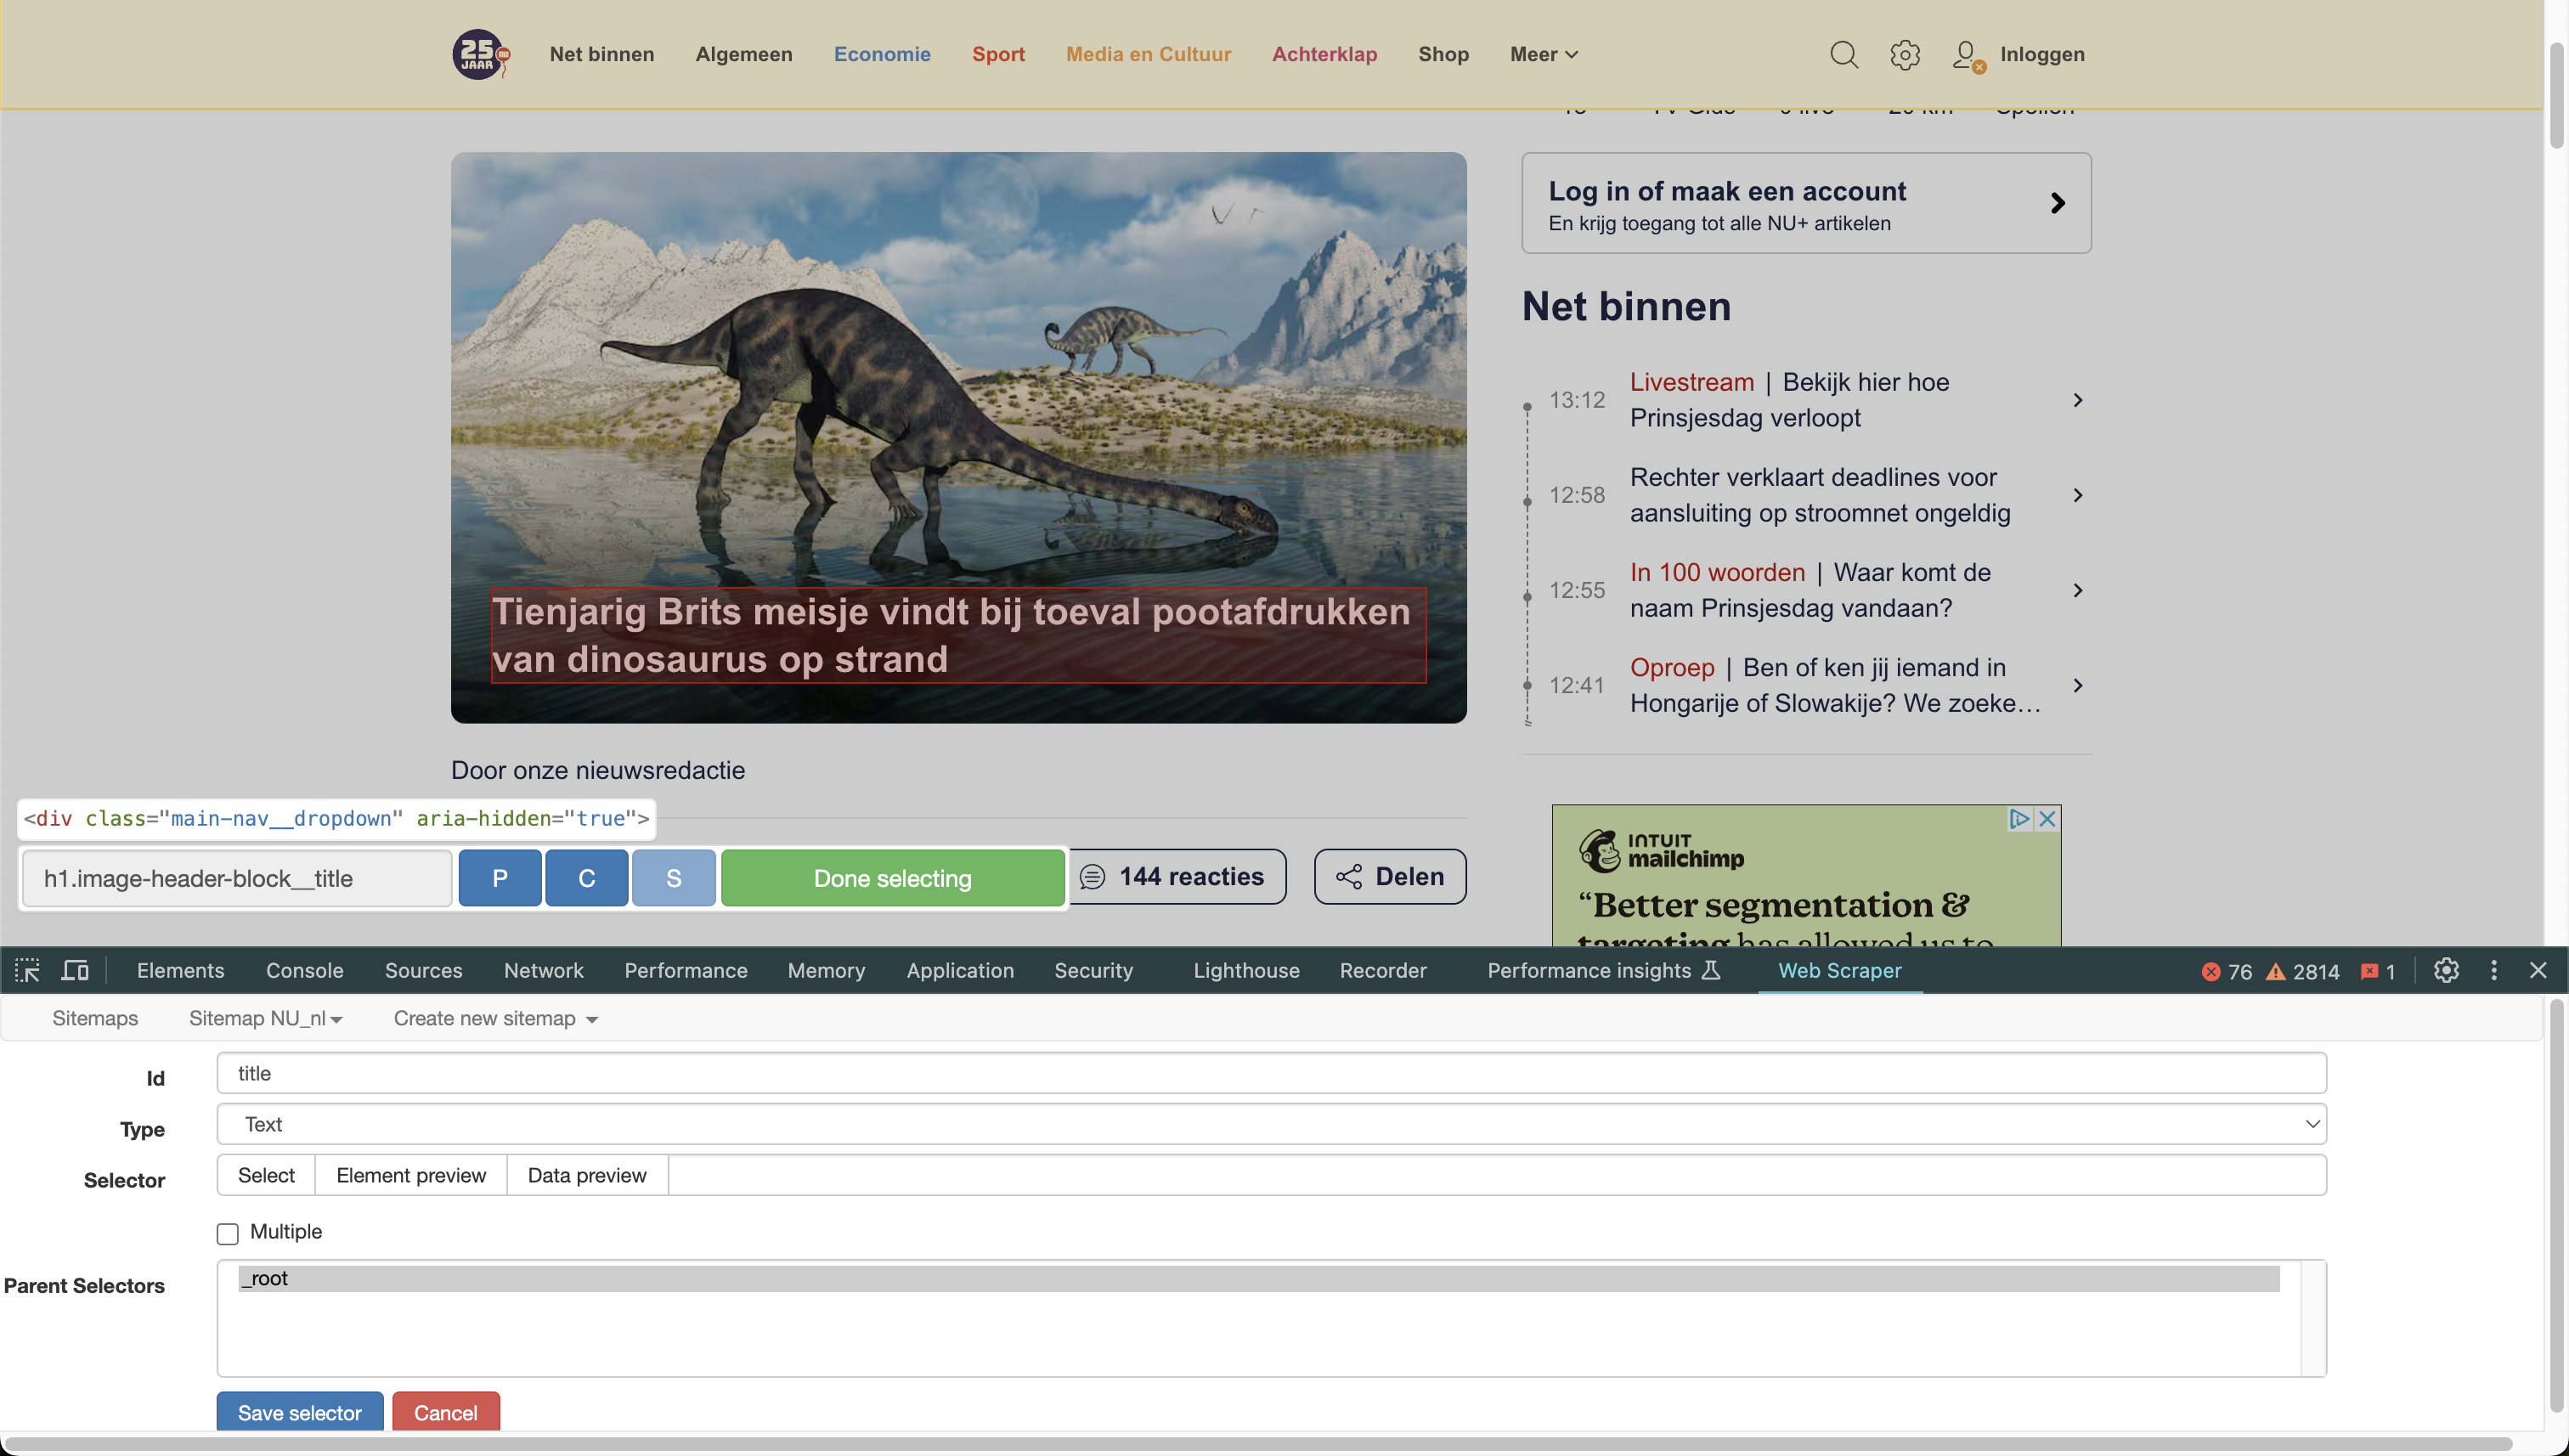

10. Once you are finished with the selectors, click on `Sitemap [YOUR_SITEMAP_NAME]` and select *Scrape*. Then keep the default settings and start scraping. A new window will pop up to scrape the specified website.

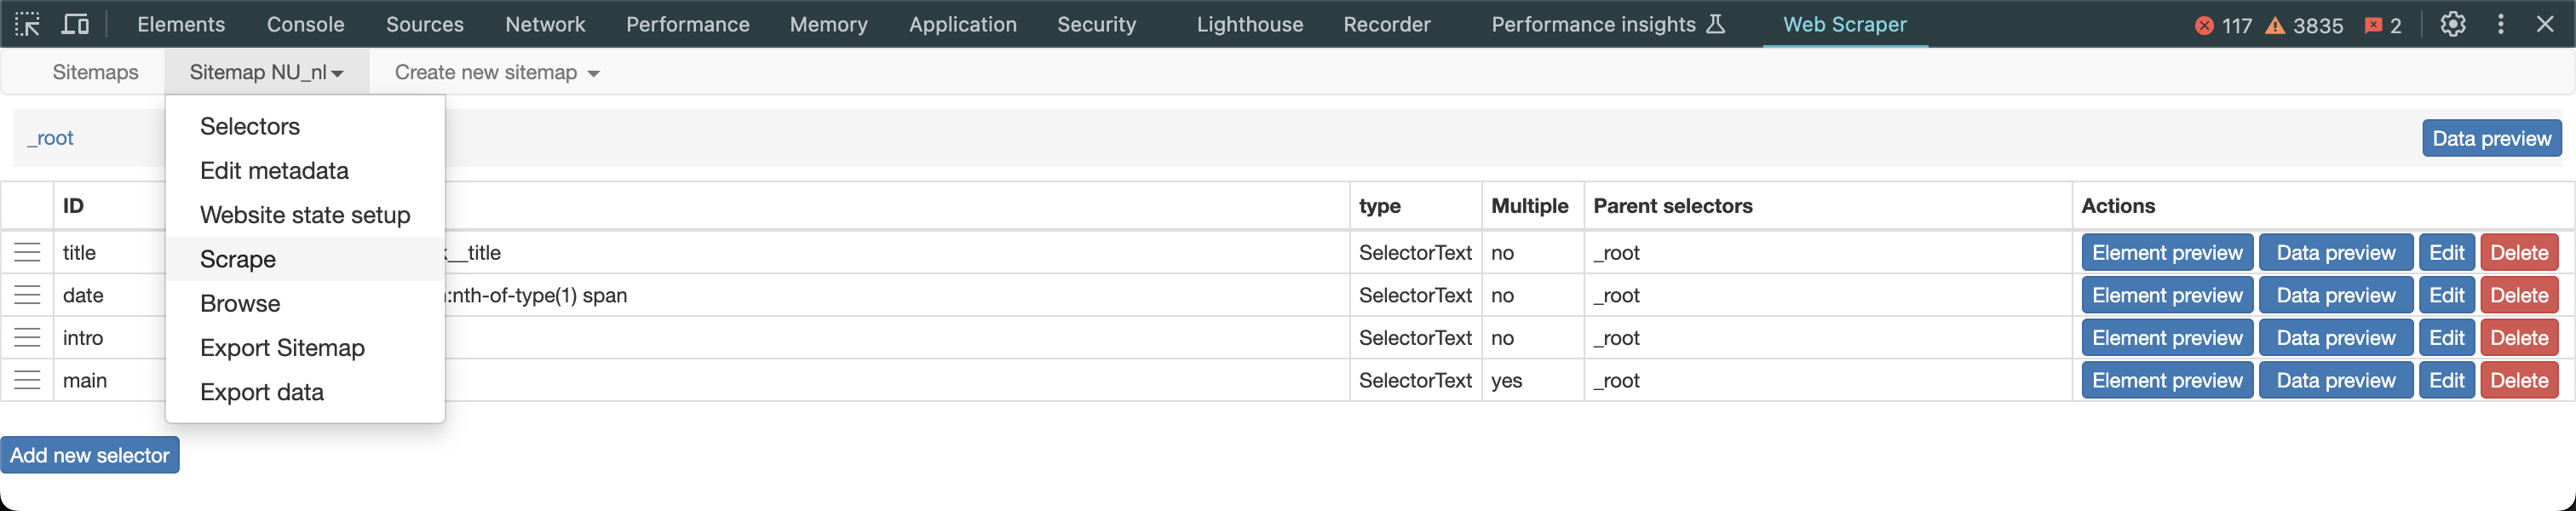

11. Now click on *refresh*. If you see the scraped data, again click on `Sitemap [YOUR_SITEMAP_NAME]` and select *Export data*. Then download it as an xlsx file.

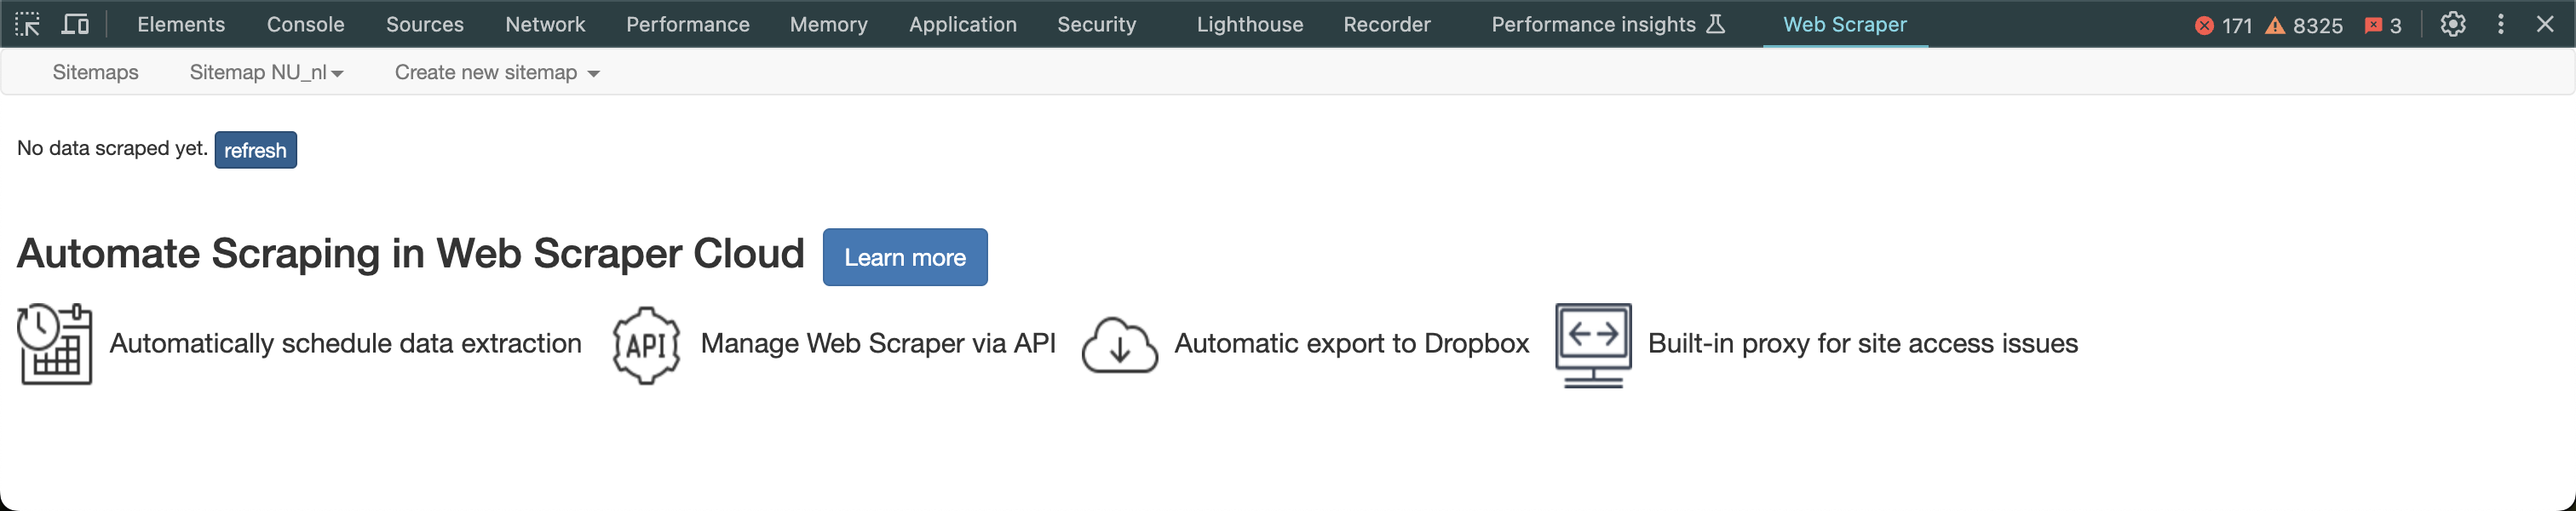

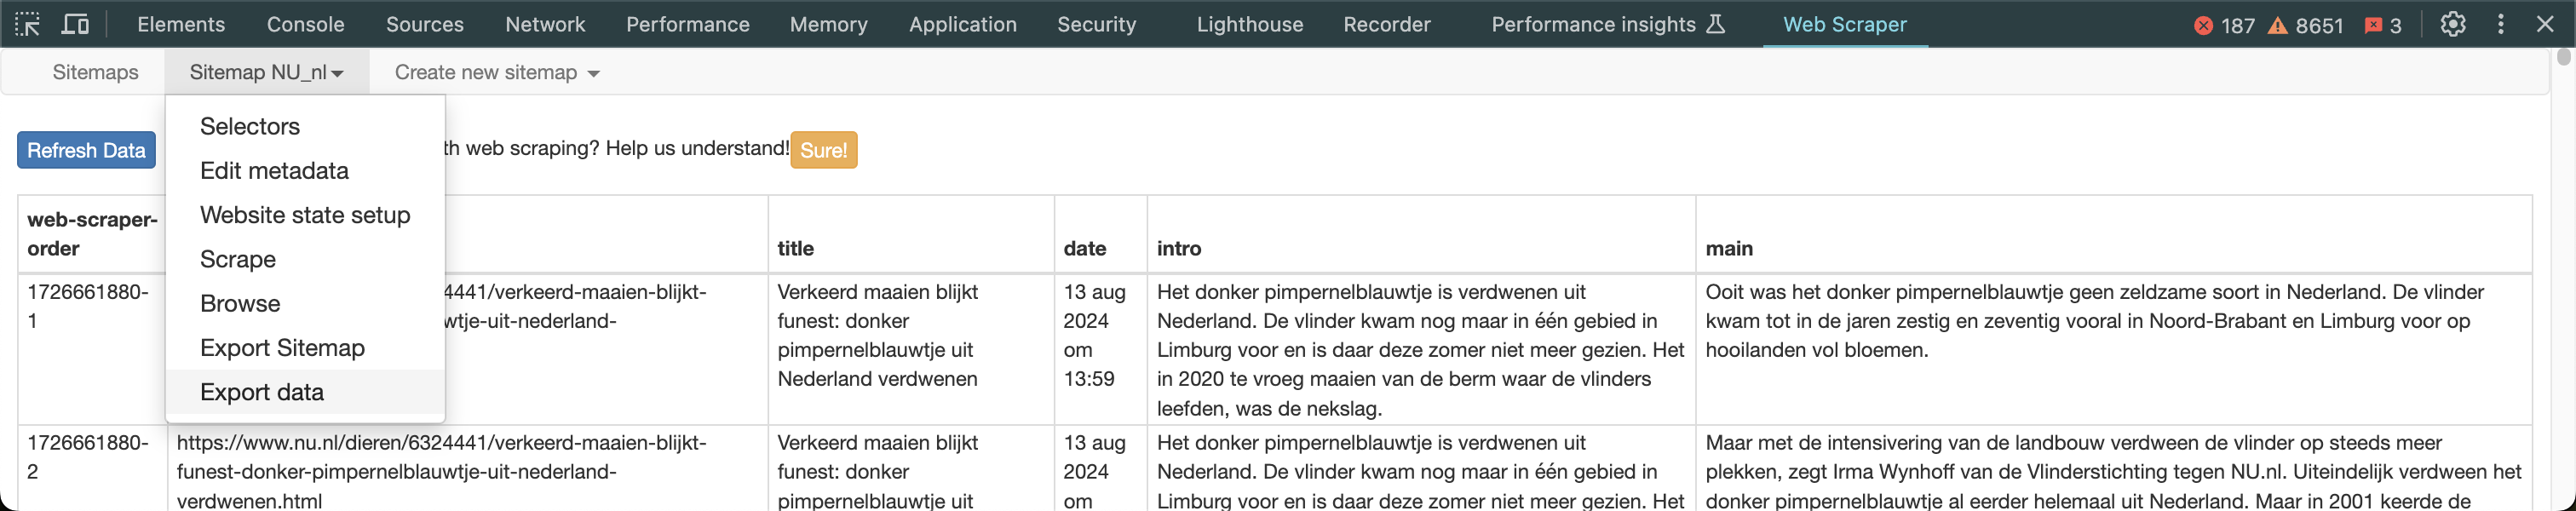

### 3.2 Using the scraped 10 articles and create word clouds of the most frequent words.

To do so, upload your xlsx file to Colab as done in the previous weeks and replace `PLACEHOLDER_FILEPATH` with your file path. Then run the code below



*ADD YOUR ANSWER HERE*

First we read in the data:

In [ ]:
import pandas as pd

nu_data = pd.read_excel('PLACEHOLDER_FILEPATH')
nu_data.head()


Edit the cell before and write the name of your selector instead of `'main'`

In [ ]:
selector_name = "main"

Next we pre-process the data so that we have a string of the text for each article.


In [ ]:
article_strings = nu_data.groupby('web-scraper-start-url')[selector_name].apply(lambda x: ' '.join(x.astype(str))).reset_index()

And we can check if the procedure worked by having a look at the first articles string:

In [ ]:
article_strings[selector_name][0]

We see that there are many very common words (het, de, van). Those are called "stop words". We will remove them for the visualziations below. For that we are creating a function that removes stop words.

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords_dutch(text):
  stop_words = set(stopwords.words('dutch'))
  word_tokens = word_tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  filtered_sentence = []
  for w in word_tokens:
    if w not in stop_words:
      filtered_sentence.append(w)
  return " ".join(filtered_sentence)


text = "Dit is een voorbeeld zin met stopwoorden."
text_without_stopwords = remove_stopwords_dutch(text)
print(text_without_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Dit voorbeeld zin stopwoorden .


Now, we can create a word cloud of each of the articles' texts.

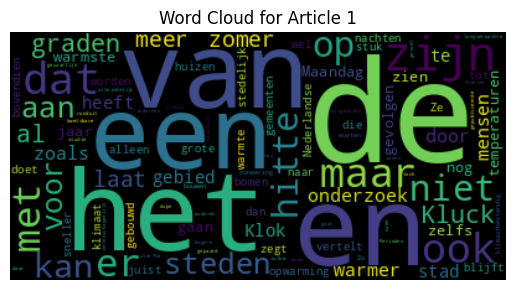

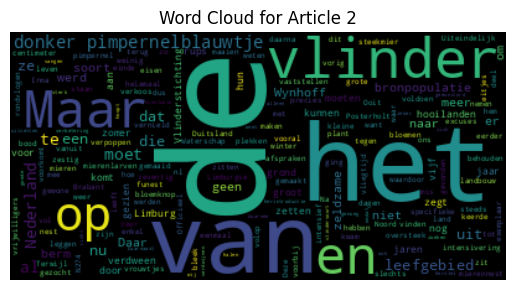

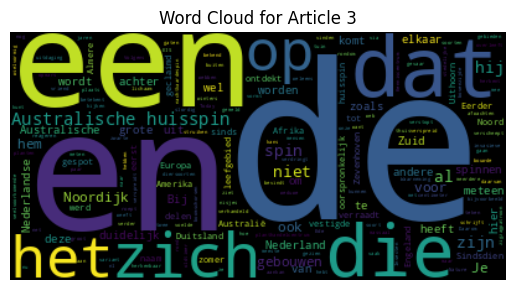

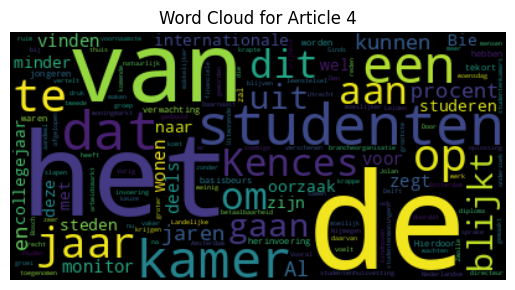

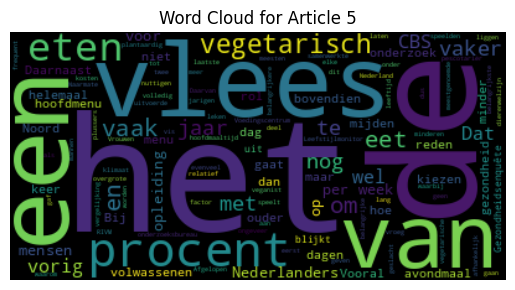

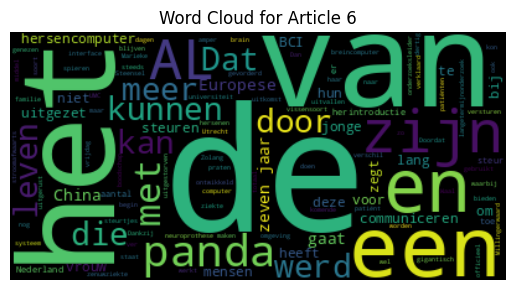

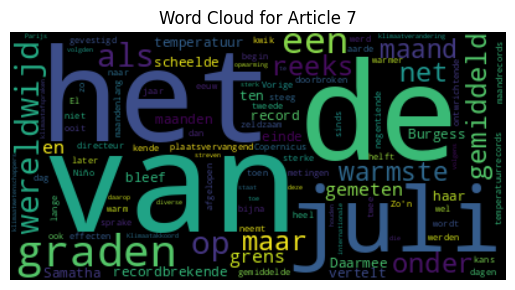

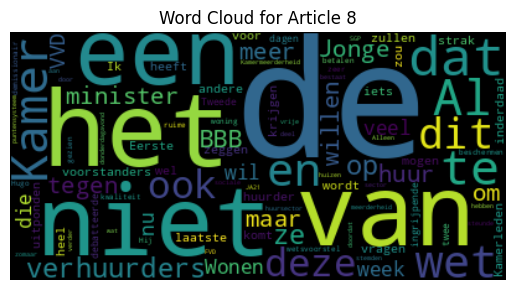

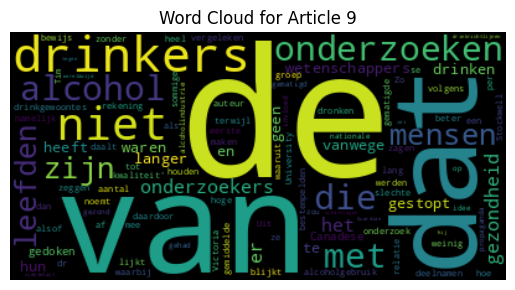

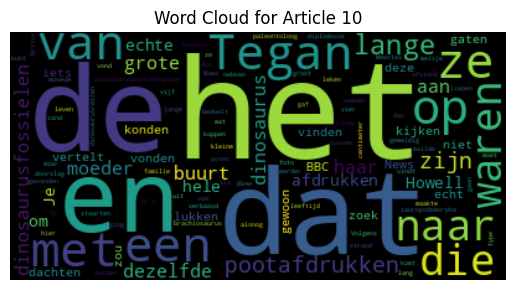

In [ ]:
for index, row in article_strings.iterrows():
    # We extract the text and convert it to lowercase so the stopwords can be removed
    text = row[selector_name].lower()

    # Remove stopwords
    text = remove_stopwords_dutch(text)

    # Plot wordcloud
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Article {index + 1}")
    plt.show()


### Don't forget to uninstall the Chrome/Firefox extension, don't keep extensions that have permissions to your browsing

# Part 4: Non-coding questions

### What file format is returned usually using the API? And when scraping websites?

* API: Usually JSON
* Scraping: HTML

### As a researcher, what are the main advantages and disadvantages of using APIs, web scraping, and data donation?

Main advantages:
* API: Legal, easy
* Web scraping: Flexible
* Data donation: Study private data, explicit consent from participnats

Main disadvantages:
* API: Public data only, often not containing the most interesting data
* Web scraping: Public data only, legally complex
* Data donation: Expensive


### Why is it important that research is reproducible and replicable? (see [Davison et al., 2023](https://www.nature.com/articles/s41562-023-01750-2)

Open science principles (reproducibility and replicability) discourage errors and misconduct (for example, misreporting of data, problematic methods or improper documentation of results) and ensures that the publised results are robust, valid and credible.

### Why is research usinig APIs often not reproducible or replicable? (see [Davison et al., 2023](https://www.nature.com/articles/s41562-023-01750-2)

* Because the data is always-on, constantly changing as users interact and platforms alter the structure of feeds and interactions
* Because the APIs change
* Because content is deleted


### Does complying with the Terms of Service of an online service (e.g. the ToS does not prevent you from scraping its data) mean you are allowed to use the data for research?(see [Freelon, 2018](https://www.tandfonline.com/doi/full/10.1080/10584609.2018.1477506?scroll=top&needAccess=true))

No, you still need to comply with privacy regulations (e.g. GDPR) and ethical principles.

When collecting personal data (as DTD often is), you need to ensure you have a legal basis (explicit informed consent or legitimate interest that outweights privacy risks), collect as little data as necesseray, and handle the data properly. 